In [1]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

In [2]:
st = gd.SimplexTree()

In [3]:
i = 0
last_block_line = 1
for line in open("./data/example_2d.txt"):
    if(line[0]!='#'):
        #print(line)
        if(i<=1):
            i=i+1
            continue
            
        elif(i==2):
            rank=[]
            for j in line.split():
                rank.append(int(j))
            i=i+1
        else:
            #print("last_block_line=",last_block_line)
            block = line.split(';')
            grid = block[0].split()
            filt_value = int(grid[0]) + int(grid[1])
            #print("grid=",grid)
            
            if len(block)>1:
                face = block[1].split()
                for j in range(len(face)):
                    face[j] = int(face[j])
                #print("face",face)
                
                st.insert(face, filtration = filt_value)
                
            else:
                st.insert([last_block_line], filtration = filt_value)
                last_block_line = last_block_line + 1
            i=i+1   

In [4]:
st_gen = st.get_filtration() 
for splx in st_gen :
    print(splx)

([1], 0.0)
([2], 1.0)
([3], 2.0)
([1, 2], 3.0)
([1, 3], 4.0)
([2, 3], 5.0)
([1, 2, 3], 6.0)


In [5]:
st.dimension()

2

In [6]:
st.num_vertices()

3

In [7]:
st.num_simplices()

7

In [8]:
barcodes = st.persistence()
for barcode in barcodes:
    print(barcode)

(1, (5.0, 6.0))
(0, (0.0, inf))
(0, (1.0, 3.0))
(0, (2.0, 4.0))


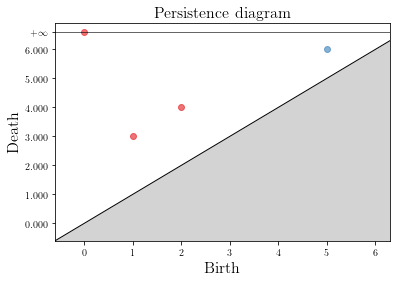

In [9]:
gd.plot_persistence_diagram(barcodes);

In [10]:
# for 0th persistent homology module

# first, let's compute rank((2,2),(3,3))

x_range = 4
y_range = 4
rank_invariance = np.array(np.zeros((x_range,y_range,x_range,y_range)))


s = [2,2]
t = [3,3]

s_1 = s[0]+s[1]
t_1 = t[0]+t[1]

print("s_1=",s_1)
print("t_1=",t_1)

rank0_inv = 0
rank1_inv = 0

for barcode in barcodes:
    if(barcode[0]==0):
        if(barcode[1][0]<=s_1 and barcode[1][1]>=t_1):
            rank0_inv = rank0_inv + 1
    elif(barcode[0]==1):
        if(barcode[1][0]<=s_1 and barcode[1][1]>=t_1):
            rank1_inv = rank1_inv + 1

print("rank0=",rank0_inv)
print("rank1=",rank1_inv)
rank_invariance[s[0],s[1],t[0],t[1]]=rank0_inv


for i in range(x_range):
    for j in range(y_range):
        for k in range(x_range):
            for l in range(y_range):
                if rank_invariance[i,j,k,l]!=0:
                    print("rank(({0},{1}),({2},{3}))={4}".format(i,j,k,l,int(rank_invariance[i,j,k,l])))

        


s_1= 4
t_1= 6
rank0= 1
rank1= 0
rank((2,2),(3,3))=1


In [11]:
# then let's compute rank invariance from (0,0) to (3,3)


def compute_rk(i,j,k,l,barcodes):
    s_1 = i + j
    t_1 = k + l

    rank0_inv = 0
    rank1_inv = 0

    for barcode in barcodes:
        if(barcode[0]==0):
            if(barcode[1][0]<=s_1 and barcode[1][1]>=t_1):
                rank0_inv = rank0_inv + 1
        elif(barcode[0]==1):
            if(barcode[1][0]<=s_1 and barcode[1][1]>=t_1):
                rank1_inv = rank1_inv + 1

    return rank0_inv


x_range = 4
y_range = 4
rank_invariance = np.array(np.zeros((x_range,y_range,x_range,y_range)))


for i in range(x_range):
    for j in range(y_range):
        for k in range(x_range):
            for l in range(y_range):
                if i<=k and j<=l:
                    rank_invariance[i,j,k,l] = compute_rk(i,j,k,l,barcodes)
                    print("rank(({0},{1}),({2},{3}))={4}".format(i,j,k,l,int(rank_invariance[i,j,k,l])))
                else:
                    rank_invariance[i,j,k,l] = 0
                


rank((0,0),(0,0))=1
rank((0,0),(0,1))=1
rank((0,0),(0,2))=1
rank((0,0),(0,3))=1
rank((0,0),(1,0))=1
rank((0,0),(1,1))=1
rank((0,0),(1,2))=1
rank((0,0),(1,3))=1
rank((0,0),(2,0))=1
rank((0,0),(2,1))=1
rank((0,0),(2,2))=1
rank((0,0),(2,3))=1
rank((0,0),(3,0))=1
rank((0,0),(3,1))=1
rank((0,0),(3,2))=1
rank((0,0),(3,3))=1
rank((0,1),(0,1))=2
rank((0,1),(0,2))=2
rank((0,1),(0,3))=2
rank((0,1),(1,1))=2
rank((0,1),(1,2))=2
rank((0,1),(1,3))=1
rank((0,1),(2,1))=2
rank((0,1),(2,2))=1
rank((0,1),(2,3))=1
rank((0,1),(3,1))=1
rank((0,1),(3,2))=1
rank((0,1),(3,3))=1
rank((0,2),(0,2))=3
rank((0,2),(0,3))=3
rank((0,2),(1,2))=3
rank((0,2),(1,3))=2
rank((0,2),(2,2))=2
rank((0,2),(2,3))=1
rank((0,2),(3,2))=1
rank((0,2),(3,3))=1
rank((0,3),(0,3))=3
rank((0,3),(1,3))=2
rank((0,3),(2,3))=1
rank((0,3),(3,3))=1
rank((1,0),(1,0))=2
rank((1,0),(1,1))=2
rank((1,0),(1,2))=2
rank((1,0),(1,3))=1
rank((1,0),(2,0))=2
rank((1,0),(2,1))=2
rank((1,0),(2,2))=1
rank((1,0),(2,3))=1
rank((1,0),(3,0))=2
rank((1,0),(3,1))=1
